In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
og_name_df = pd.read_csv('./HAPT Data Set/features.txt', sep='\s',
                        header= None,
                        names = ['column_name'])

og_name_df = og_name_df.reset_index()
og_name_df

,index,column_name
0,0,tBodyAcc-Mean-1
1,1,tBodyAcc-Mean-2
2,2,tBodyAcc-Mean-3
3,3,tBodyAcc-STD-1
4,4,tBodyAcc-STD-2
...,...,...
556,556,tBodyGyro-AngleWRTGravity-1
557,557,tBodyGyroJerk-AngleWRTGravity-1
558,558,tXAxisAcc-AngleWRTGravity-1
559,559,tYAxisAcc-AngleWRTGravity-1


In [5]:
# step 1~2 column_name을 기준으로 groupby(by='column_name')
# cumcount()함수를 통해 중복된 값을 살펴본다.
cum_name_sr = og_name_df.groupby(by='column_name').cumcount()

# step 3 위의 결과를 df로 생성
new_name_df = pd.DataFrame(cum_name_sr, columns=['copy_cnt'])
new_name_df = new_name_df.reset_index()

# step 4 위의 new_name_df와 og_name_df를 merge를 합니다 ^^
# cf) index 컬럼을 기준으로...

ftr_names_df = pd.merge(og_name_df,new_name_df, how='outer')

In [6]:
### 위에서 생성된 ftr_names_df를 컬럼명으로 적용
##  apply_lambda를 통해...

# 1번 버전
ftr_names_df['column_name'] = ftr_names_df[['column_name','copy_cnt']].apply(lambda x: str(x[0])+'_'+str(x[1]), axis=1)

# # 조금 더 전처리를 원하시면? - 2
# ftr_names_df['column_name'] = ftr_names_df[['column_name','copy_cnt']].apply(lambda x: str(x[0])+'_'+str(x[1]) if int(x[1]) >0 else x[0], axis=1)
# ftr_names_df[name_copy_cnt['copy_cnt']>0]

In [7]:
# 새롭게 정의된 feature names를 확인
ftr_names_df[ftr_names_df.copy_cnt>0]

## 새로운 컬러명 변수에 할당
ftr_names = ftr_names_df['column_name'].values.tolist()
ftr_names

['tBodyAcc-Mean-1_0',
 'tBodyAcc-Mean-2_0',
 'tBodyAcc-Mean-3_0',
 'tBodyAcc-STD-1_0',
 'tBodyAcc-STD-2_0',
 'tBodyAcc-STD-3_0',
 'tBodyAcc-Mad-1_0',
 'tBodyAcc-Mad-2_0',
 'tBodyAcc-Mad-3_0',
 'tBodyAcc-Max-1_0',
 'tBodyAcc-Max-2_0',
 'tBodyAcc-Max-3_0',
 'tBodyAcc-Min-1_0',
 'tBodyAcc-Min-2_0',
 'tBodyAcc-Min-3_0',
 'tBodyAcc-SMA-1_0',
 'tBodyAcc-Energy-1_0',
 'tBodyAcc-Energy-2_0',
 'tBodyAcc-Energy-3_0',
 'tBodyAcc-IQR-1_0',
 'tBodyAcc-IQR-2_0',
 'tBodyAcc-IQR-3_0',
 'tBodyAcc-ropy-1_0',
 'tBodyAcc-ropy-1_1',
 'tBodyAcc-ropy-1_2',
 'tBodyAcc-ARCoeff-1_0',
 'tBodyAcc-ARCoeff-2_0',
 'tBodyAcc-ARCoeff-3_0',
 'tBodyAcc-ARCoeff-4_0',
 'tBodyAcc-ARCoeff-5_0',
 'tBodyAcc-ARCoeff-6_0',
 'tBodyAcc-ARCoeff-7_0',
 'tBodyAcc-ARCoeff-8_0',
 'tBodyAcc-ARCoeff-9_0',
 'tBodyAcc-ARCoeff-10_0',
 'tBodyAcc-ARCoeff-11_0',
 'tBodyAcc-ARCoeff-12_0',
 'tBodyAcc-Correlation-1_0',
 'tBodyAcc-Correlation-2_0',
 'tBodyAcc-Correlation-3_0',
 'tGravityAcc-Mean-1_0',
 'tGravityAcc-Mean-2_0',
 'tGravityAcc-Mean-3

In [8]:
# 위의 전처리된 컬럼명을 X_train과 X_test에 적용
# 분석을 수행

X_train = pd.read_csv('./HAPT Data Set/train/X_train.txt',
                     header=None,
                     sep='\s',
                     names=ftr_names)

X_test = pd.read_csv('./HAPT Data Set/test/X_test.txt',
                     header=None,
                     sep='\s',
                     names=ftr_names)

y_train =  pd.read_csv('./HAPT Data Set/train/y_train.txt',
                     header=None,
                     sep='\s',
                     names=['target'])

y_test =  pd.read_csv('./HAPT Data Set/test/y_test.txt',
                     header=None,
                     sep='\s',
                     names=['target'])

In [9]:
### DecisionTree로 동작예측분류

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score as acc_sc

import time

In [10]:
# 의사결정나무에 해당하는 분석

start = time.time()

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred_dt = dt_clf.predict(X_test)
print('dt_clf의 정확도:{0:.4f}'.format(acc_sc(y_test, pred_dt)))

total_time = time.time() - start
print('dt_clf의 수행시간:{0:.2f}초'.format(total_time))

dt_clf의 정확도:0.8125
dt_clf의 수행시간:5.81초


In [ ]:
## Hyper parameter 튜닝 시도
## GridsearchCV

from sklearn.model_selection import GridSearchCV
import time

start_time1 = time.time()
params = {
    'max_depth':[6,8,10,12,16,20,24]
}

grid_dt_clf = GridSearchCV(dt_clf, param_grid=params, scoring = 'accuracy', cv=5)
grid_dt_clf.fit(X_train, y_train)

print('GridSearchCV 최고 평균정확도:{0:.4f}'.format(grid_dt_clf.best_score_))
print('GridSearchCV 최적 하이퍼파라미터:{0}'.format(grid_dt_clf.best_params_))   
      

total_time1 = time.time() - start_time1
print('GridSearch 수행시간:{0:.2f}초'.format(total_time1))


In [ ]:
# test_data를 적용하여
# max_depth에 따른 값을 확인한다.

max_depths = [6,8,10,12,16,20,24]

cv_result = []
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred_dt = dt_clf.predict(X_test)
    accuracy_dt = acc_sc(y_test, pred_dt)
    cv_result.append(accuracy_dt)    
    print('max_depth = {0} 정확도:{1:.4f}'.format(depth, accuracy_dt)) 
    # 위의 데이터는 test loss를 그래프화가 아닌
    # 숫자 형태로 표현한 것이라 할 수 있음

In [ ]:
cv_result

In [ ]:
import matplotlib.pyplot as plt

plt.plot([6,8,10,12,16,20,24],cv_result)

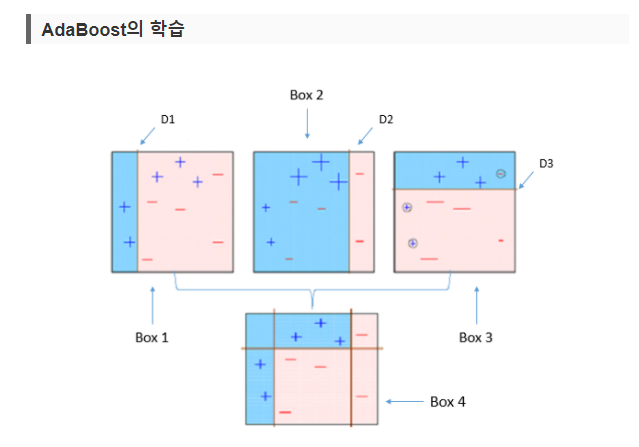

Step 1) 첫 번째 약한 학습기가 첫번째 분류기준(D1)으로 + 와 - 를 분류

Step 2) 잘못 분류된 데이터에 대해 가중치를 부여(두 번쨰 그림에서 커진 + 표시)

Step 3) 두 번째 약한 학습기가 두번째 분류기준(D2)으로 +와 - 를 다시 분류

Step 4) 잘못 분류된 데이터에 대해 가중치를 부여(세 번째 그림에서 커진 - 표시)

Step 5) 세 번째 약한 학습기가 세번째 분류기준으로(D3) +와 -를 다시 분류해서 오류 데이터를 찾음

Step 6) 마지막으로 분류기들을 결합하여 최종 예측 수행

→ 약한 학습기를 순차적으로 학습시켜, 개별 학습기에 가중치를 부여하여 모두 결합함으로써 개별 약한 학습기보다 높은 정확도의 예측 결과를 만듦 

In [25]:
# end of file